#Simplified Attention Mechanism Without Trainable Weights

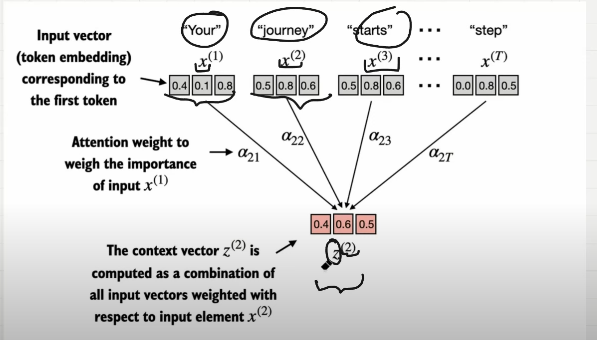

In [1]:
import torch

In [ ]:
# 3 dimensional token embeddings
 

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']
xCords = inputs[:, 0].numpy() # First columns is x
yCords = inputs[:, 1].numpy() # Second columns is y
zCords = inputs[:, 2].numpy() # Third Column is z

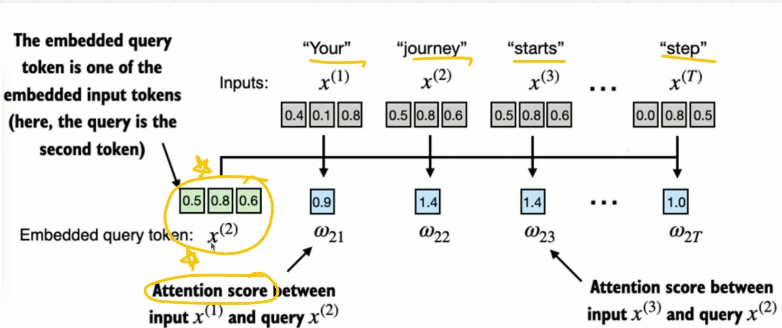

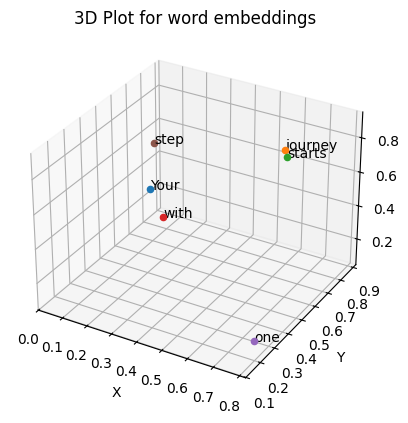

In [9]:
# 3D plot
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

for x, y, z, word in zip(xCords, yCords, zCords, words):
  axis.scatter(x,y,z)
  axis.text(x,y,z,word, fontsize=10)

axis.set_xlabel("X")
axis.set_ylabel("Y")
axis.set_zlabel("Z")

plt.title("3D Plot for word embeddings")
plt.show()

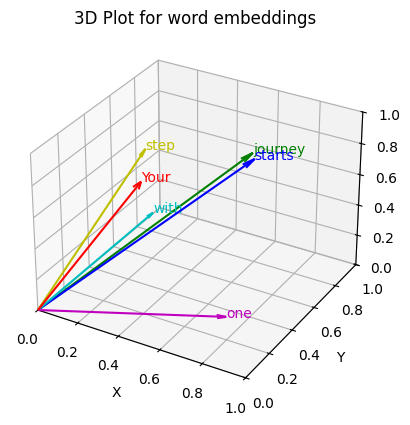

In [13]:
# Creating 3D vectors from origin to each point in space

fig = plt.figure()
axis = fig.add_subplot(111, projection = '3d')
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for x, y, z, word, color in zip(xCords, yCords, zCords, words, colors):
  axis.quiver(0, 0, 0, x, y, z, color = color, arrow_length_ratio = 0.05)
  axis.text(x, y, z, word, color=color)

axis.set_xlabel("X")
axis.set_ylabel("Y")
axis.set_zlabel("Z")

axis.set_xlim([0,1])
axis.set_ylim([0,1])
axis.set_zlim([0,1])

plt.title("3D Plot for word embeddings")
plt.show()

# Step 1) Calculating Intermediation Attention Scores(w)

In [14]:
query = inputs[1] #x^2 --> Journey (2nd Token)
attentionScores2 = torch.empty(inputs.shape[0]) # Empty Tensor  of size 6
#Calculating Dot Product
for i, xi in enumerate(inputs):  # is is the index xi is the row at that index
  attentionScores2[i] = torch.dot(xi, query)
print(attentionScores2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


From the above result we can se the attention score w25 is the least that is relation between journey and one, it is also visible in 3d plot

whereas journey and starts are more aligned to each other

# Step 2) Normalization to convert Attention Scores Interpretable

In [15]:
attentionweightsTemp = attentionScores2 / attentionScores2.sum()
print(attentionweightsTemp)
print(attentionweightsTemp.sum())

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
tensor(1.0000)


# Normalization Using Softmax

In [18]:
def naiveSoftmax(x): # Without Preventing Overflow COndition
  return torch.exp(x) / torch.exp(x).sum(dim = 0)
attentionweight2naive =  naiveSoftmax(attentionScores2)
print(attentionweight2naive)
print(attentionweight2naive.sum())

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


In [20]:
# Pytorch Softmax --> [e^(x1-max)/sum, e^(x2-max)/sum, ...... e^(x6-max)/sum]
attentionWeights2 = torch.softmax(attentionScores2, dim = 0)
print(attentionWeights2)
print(attentionWeights2.sum())

# Prevents overflow and underflow condition

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


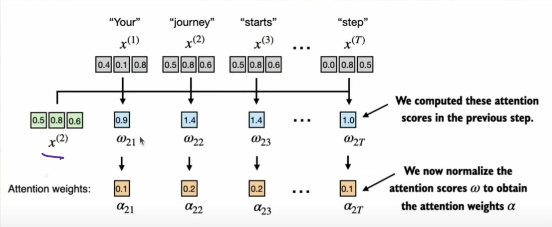

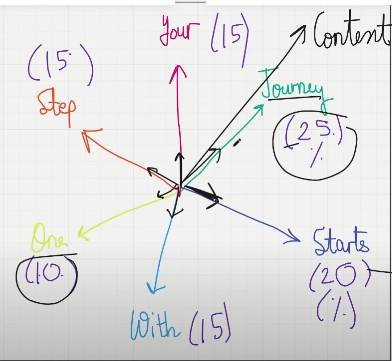

#STEP3)
Context Vector(z2) is calculated as a weighted sum of all input vectors

Multiplying each input vector with its corresponding attention weight

In [24]:
query = inputs[i]
contextVector2 = torch.zeros(query.shape) # Single row
for i, xi in enumerate(inputs):
  contextVector2 += attentionWeights2[i]*xi  # Multiplying attention weights and input vector and summing up them all
print(contextVector2)

tensor([0.4419, 0.6515, 0.5683])


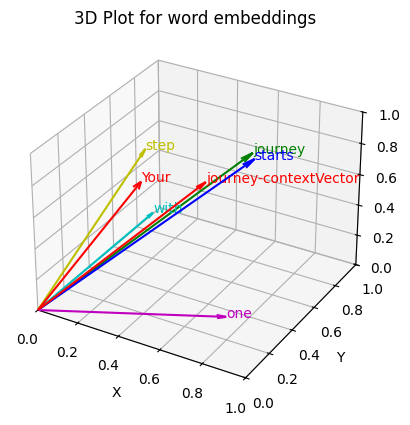

In [29]:
# Creating 3D vectors from origin to each point in space

newInputs = torch.tensor (
    [[0.43, 0.15, 0.89],  #(x^1) Your
     [0.55, 0.87, 0.66],  #(x^2) journey
     [0.57, 0.85, 0.64],  #(x^3) starts
     [0.22, 0.58, 0.33],  #(x^4) with
     [0.77, 0.25, 0.10],  #(x^5) one
     [0.05, 0.80, 0.55],  #(x^6) step
     [0.4419, 0.6515, 0.5683]]  # COntext vector
)

words = ['Your', 'journey', 'starts', 'with', 'one', 'step', "journey-contextVector"]
xCords = newInputs[:, 0].numpy() # First columns is x
yCords = newInputs[:, 1].numpy() # Second columns is y
zCords = newInputs[:, 2].numpy() # Third Column is z

# 3D plot


fig = plt.figure()
axis = fig.add_subplot(111, projection = '3d')
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']
for x, y, z, word, color in zip(xCords, yCords, zCords, words, colors):
  axis.quiver(0, 0, 0, x, y, z, color = color, arrow_length_ratio = 0.05)
  axis.text(x, y, z, word, color=color)

axis.set_xlabel("X")
axis.set_ylabel("Y")
axis.set_zlabel("Z")

axis.set_xlim([0,1])
axis.set_ylim([0,1])
axis.set_zlim([0,1])

plt.title("3D Plot for word embeddings")
plt.show()

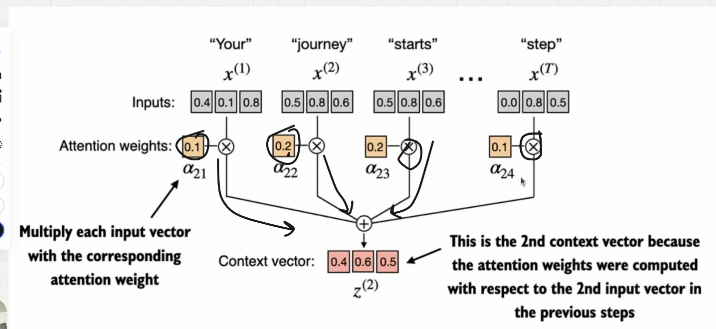

#Step 4)
Context Vector For Token --> Journey is created
Now Need to Calculate attention weights for each vector then doing the same calculation for each token for indivisual context Tokens

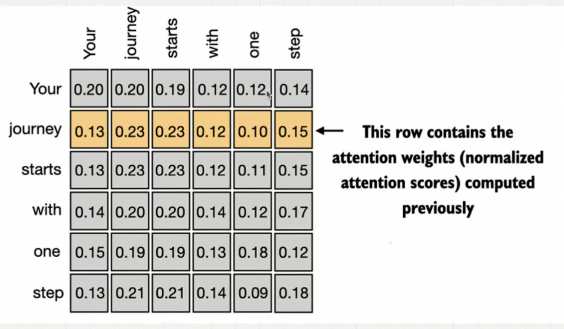

1) Compute Attention Scores
2) Compute Attention Weights By Normalizing Attention Scores
3) Compute Context vectors by adding products of each input vector with there corresponding attention weights

In [30]:
attentionScores = torch.empty(6, 6) # 6 rows and 6 columns
for i, xi in enumerate(inputs):
  for j, xj in enumerate(inputs):
    attentionScores[i, j] = torch.dot(xi, xj)
print(attentionScores) # Attention Matrix

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


Using Loops is computationaly slow and takes a lot of time if the dimensions are high So Better Method is

In [32]:
attentionScoresMatrix = inputs @ inputs.T
print(attentionScoresMatrix)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [33]:
# Normalization Using SoftMax

attentionWeightsMatrix = torch.softmax(attentionScoresMatrix, dim=1)
print(attentionWeightsMatrix)
print(attentionWeightsMatrix.sum())

# Using dim =1 we our instructing softmax func to perform normalization across the columns
# If attentionScores is 2d matrix dim 1 will normalize across columns which will led to sum of each row to 1

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
tensor(6.)


In [34]:
ContextMatrix = attentionWeightsMatrix @ inputs
print(ContextMatrix)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
